# Life Expectancy Analysis

Erin Hoffman

This dataset was downloaded from [Kaggle](https://www.kaggle.com/kumarajarshi/life-expectancy-who) and reflects data collected by the WHO about life expectancy and potentially-related factors.  The information is aggregated on a per-country per-year basis.

The following questions have been posed `[citation needed]`:

1. Do countries with a lower life expectancy value (<65) have lower schooling?
2. How does Infant and Adult mortality rates affect life expectancy?
3. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
4. What is the impact of schooling on the lifespan of humans?
5. Does Life Expectancy have positive or negative relationship with drinking alcohol?
6. Do densely populated countries tend to have lower life expectancy?
7. What is the impact of Immunization coverage on life Expectancy?

## Importing the Data

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [2]:
df = pd.read_csv(os.path.join(os.pardir, "data", "life_expectancy.csv"))

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Data Cleaning

Currently we have multiple years for the same country, let's limit it to a single year

In [4]:
df['Year'].value_counts()

2013    193
2015    183
2011    183
2009    183
2007    183
2005    183
2003    183
2001    183
2014    183
2012    183
2010    183
2008    183
2006    183
2004    183
2002    183
2000    183
Name: Year, dtype: int64

Looks like we have the most complete data for 2013, so let's keep that one

In [5]:
df = df[df['Year'] == 2013]

In [6]:
df.shape

(193, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 2 to 2924
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          193 non-null    object 
 1   Year                             193 non-null    int64  
 2   Status                           193 non-null    object 
 3   Life expectancy                  183 non-null    float64
 4   Adult Mortality                  183 non-null    float64
 5   infant deaths                    193 non-null    int64  
 6   Alcohol                          191 non-null    float64
 7   percentage expenditure           193 non-null    float64
 8   Hepatitis B                      182 non-null    float64
 9   Measles                          193 non-null    int64  
 10   BMI                             189 non-null    float64
 11  under-five deaths                193 non-null    int64  
 12  Polio                

In [8]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,193.0,183.000000,183.000000,193.000000,191.000000,193.000000,182.000000,193.000000,189.000000,193.000000,193.000000,191.000000,193.000000,193.000000,160.000000,1.440000e+02,189.000000,189.000000,176.000000,180.000000
mean,2013.0,71.236066,148.765027,23.968912,3.924450,836.623984,83.148352,1455.150259,42.111640,32.419689,84.642487,6.385026,86.207254,0.744560,8152.675657,1.235609e+07,4.470370,4.425397,0.685648,12.688333
std,0.0,8.413771,106.673397,88.015086,4.178379,2389.338858,23.877333,7776.893575,21.615409,118.050991,23.293232,2.855698,19.908084,1.572711,16132.043848,2.772130e+07,4.200161,4.128352,0.152495,3.134602
min,2013.0,49.900000,5.000000,0.000000,0.010000,0.000000,6.000000,0.000000,2.100000,0.000000,3.000000,1.120000,3.000000,0.100000,14.214412,2.920000e+02,0.100000,0.100000,0.341000,0.000000
25%,2013.0,65.600000,67.500000,0.000000,0.010000,10.666707,81.250000,0.000000,23.200000,0.000000,82.000000,4.420000,83.000000,0.100000,671.860248,2.895338e+05,1.400000,1.400000,0.564500,10.800000
50%,2013.0,73.200000,135.000000,2.000000,2.410000,97.522115,93.000000,6.000000,48.600000,3.000000,94.000000,5.960000,94.000000,0.100000,2354.253395,1.486308e+06,3.300000,3.300000,0.719500,12.900000
75%,2013.0,76.700000,219.000000,17.000000,7.505000,594.645310,97.000000,195.000000,59.400000,20.000000,98.000000,7.915000,98.000000,0.400000,6972.002282,1.018180e+07,6.600000,6.600000,0.796000,14.700000
max,2013.0,87.000000,518.000000,1000.000000,15.040000,19099.045060,99.000000,88381.000000,87.300000,1300.000000,99.000000,17.240000,99.000000,9.800000,113751.850000,1.817126e+08,26.800000,27.500000,0.942000,20.300000


In [9]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### Question 1: Does Schooling Impact Whether a Country Has Low Life Expectancy?

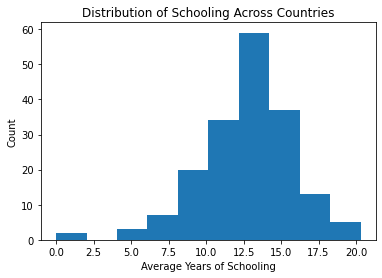

In [10]:
fig, ax = plt.subplots()

ax.hist(df['Schooling'])

ax.set_xlabel('Average Years of Schooling')
ax.set_ylabel('Count')

ax.set_title('Distribution of Schooling Across Countries')

plt.savefig(os.path.join(os.pardir, "reports", "img", "distribution_of_schooling.png"));

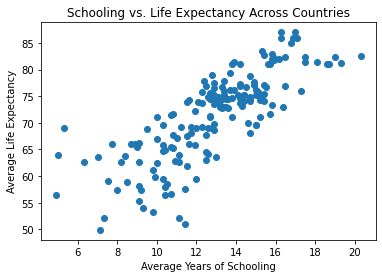

In [11]:
fig, ax = plt.subplots()

ax.scatter(df['Schooling'], df['Life expectancy '])

ax.set_xlabel('Average Years of Schooling')
ax.set_ylabel('Average Life Expectancy')

ax.set_title('Schooling vs. Life Expectancy Across Countries');

Overall, this looks like a positive correlation.  What if we define "low life expectancy" to mean life expectancy below 65?

In [12]:
low_life_expectancy = df[df['Life expectancy '] < 65]
high_life_expectancy = df[df['Life expectancy '] >= 65]

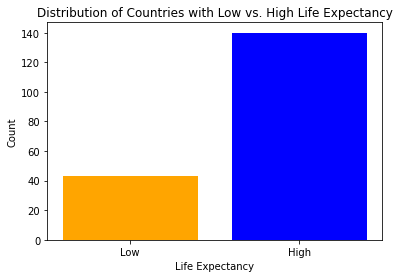

In [13]:
fig, ax = plt.subplots()

ax.bar(
    x=["Low", "High"],
    height=[len(low_life_expectancy), len(high_life_expectancy)],
    color=["orange", "blue"]
)

ax.set_xlabel("Life Expectancy")
ax.set_ylabel("Count")

ax.set_title("Distribution of Countries with Low vs. High Life Expectancy")

plt.savefig(os.path.join(os.pardir, "reports", "img", "life_expectancy.png"));

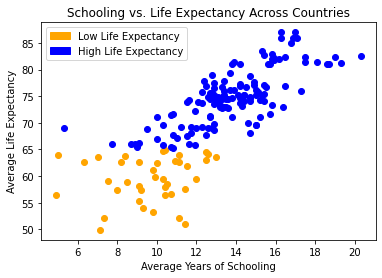

In [14]:
fig, ax = plt.subplots()

ax.scatter(low_life_expectancy['Schooling'], low_life_expectancy['Life expectancy '], c="orange")
ax.scatter(high_life_expectancy['Schooling'], high_life_expectancy['Life expectancy '], c="blue")

ax.set_xlabel('Average Years of Schooling')
ax.set_ylabel('Average Life Expectancy')

ax.set_title('Schooling vs. Life Expectancy Across Countries')

orange_patch = mpatches.Patch(color='orange', label='Low Life Expectancy')
blue_patch = mpatches.Patch(color='blue', label='High Life Expectancy')

ax.legend(handles=[orange_patch, blue_patch])

plt.savefig(os.path.join(os.pardir, "reports", "img", "schooling_and_life_expectancy.png"));

### Hypothesis Test

#### Null Hypothesis
The average years of schooling is the same between low and high life expectancy countries

#### Alternative Hypothesis
The average years of schooling is not the same between low and high life expectancy countries

We will be using an independent t-test to determine whether we can reject the null hypothesis at an alpha of 0.05

In [15]:
statistic_1, pvalue_1 = stats.ttest_ind(low_life_expectancy['Life expectancy '], high_life_expectancy['Life expectancy '], equal_var=False)

In [16]:
statistic_1

-19.9674870394773

In [17]:
pvalue_1

3.535032394002748e-34

This p-value is much smaller than our alpha, so we can reject the null hypothesis and conclude that the average years of schooling is not the same for low and high life expectancy countries